In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates as dt
%matplotlib inline

In [3]:
files_path = r'D:\Stations_data\Stations_data\Bani\all_months_copy'
os.chdir(files_path)

In [4]:
df = pd.read_csv('till_january.csv', sep=',')
df.head()

date  S1counts  S1SM  S1Perm  S1Temp  S1Volt  S2counts  \
0  10.03.2020 15:13:50   14121.0  5.47    9.11  19.438   12.17   12463.0   
1  10.03.2020 15:23:50   14122.0  5.47    9.10  19.484   12.17   12463.0   
2  10.03.2020 15:33:50   14123.0  5.47    9.10  19.508   12.17   12463.0   
3  10.03.2020 15:43:50   14124.0  5.47    9.10  19.539   12.17   12463.0   
4  10.03.2020 15:53:50   14124.0  5.47    9.10  19.602   12.17   12463.0   

    S2SM  S2Perm  S2Temp  ...  S9counts  S9SM  S9Perm  S9Temp  S9Volt  \
0  10.88   20.51  19.914  ...   15030.0  3.93    5.36  20.500   12.09   
1  10.88   20.51  19.898  ...   15031.0  3.93    5.36  20.664   12.09   
2  10.88   20.51  19.922  ...   15031.0  3.93    5.36  20.914   12.11   
3  10.88   20.51  19.898  ...   15032.0  3.93    5.35  21.125   12.11   
4  10.88   20.51  19.898  ...   15032.0  3.93    5.35  21.250   12.11   

   S10counts  S10SM  S10Perm  S10Temp  S10Volt  
0    13563.0   6.81    12.16   19.273    12.11  
1    13562.0   6.81    12.17   19.281    12.11  
2    13562.0   6.81    12.17   19.289    12.14  
3    13562.0   6.81    12.17   19.313    12.14  
4    13563.0   6.81    12.16   19.359    12.14  

[5 rows x 51 columns]

In [5]:
df['date'] = pd.to_datetime(df.date, format = "%d.%m.%Y %H:%M:%S")
df = df.set_index('date')
df = df.sort_index()

In [6]:
#plt.plot(df.index, df.S1SM);

In [7]:
df_1hr = df.resample('60min').mean()

In [8]:
df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)
# df2_1hr

In [9]:
sns.set()

In [10]:
df3 = pd.read_csv('Temp_Rain_Bani.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()
df3_1hr.head()

Temp (0C)  Rainfall (mm)
Date & Time                                  
2020-03-01 00:00:00    19.3475            0.1
2020-03-01 01:00:00    18.4375            0.0
2020-03-01 02:00:00    17.7300            0.0
2020-03-01 03:00:00    17.0700            0.0
2020-03-01 04:00:00    16.6675            0.0

In [11]:
# days = mdates.DayLocator()
# days
df2_1hr.values.max()

8.9

In [12]:
myFmt = dt.DateFormatter('%Y-%m-%d')

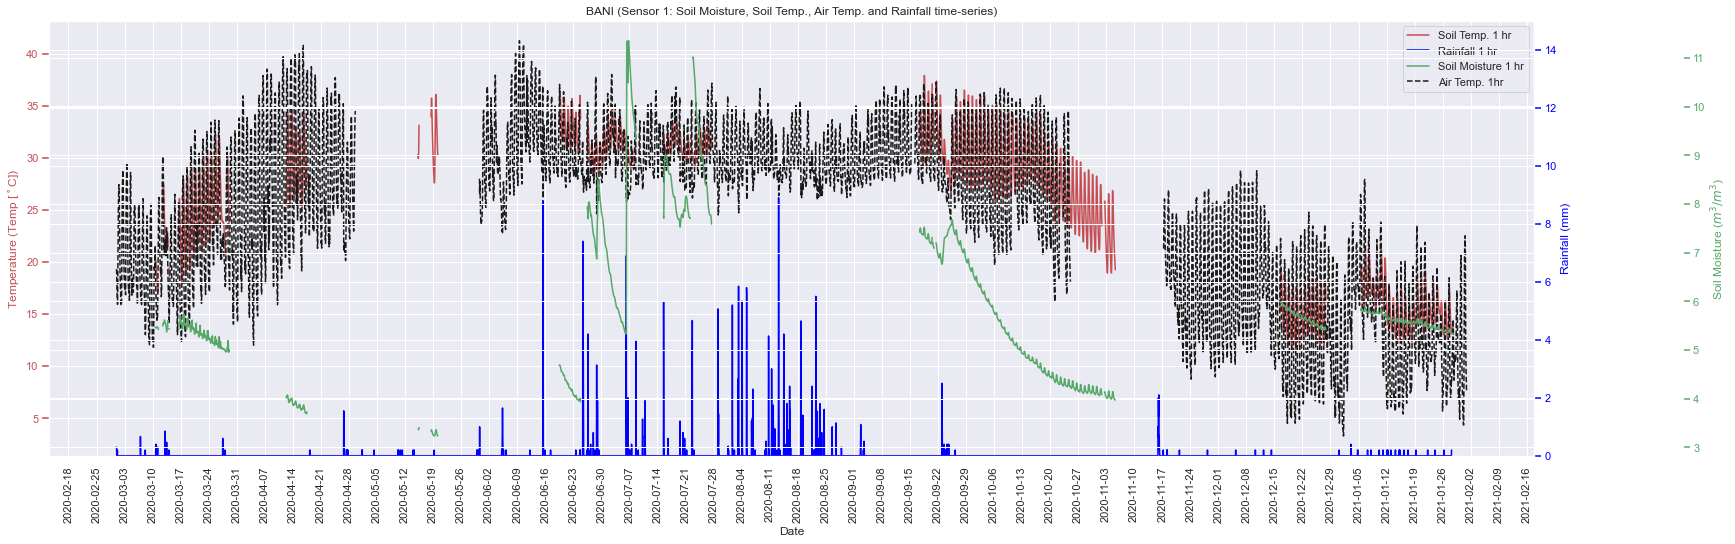

In [13]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
# par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S1Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(df_1hr.index, df_1hr.S1SM, "g-", label="Soil Moisture 1 hr")
p2, = par1.plot(df2_1hr.index, df2_1hr['Int_Rainfall (mm)'], color = 'blue', label="Rainfall 1 hr")
p4, = host.plot(df3_1hr.index, df3_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 1: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
par2.set_ylabel("Soil Moisture ($m^3/m^3$)")
host.set_ylabel("Temperature (Temp [$^\circ$C])")
par1.set_ylabel("Rainfall (mm)")
par1.set_ylim((0, 15))
# par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
# par3.yaxis.label.set_color(p4.get_color())

# host.xaxis.set_major_locator(days)
plt.xticks(rotation = 90)
# host.xaxis.set_major_formatter(yearsFmt)
# host.xaxis.set_minor_locator(months)

tkw = dict(size=7, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw, rotation = 90)

lines = [p1, p2, p3, p4]
host.xaxis.set_major_locator(dt.WeekdayLocator(interval=1))

host.legend(lines, [l.get_label() for l in lines])

plt.show()

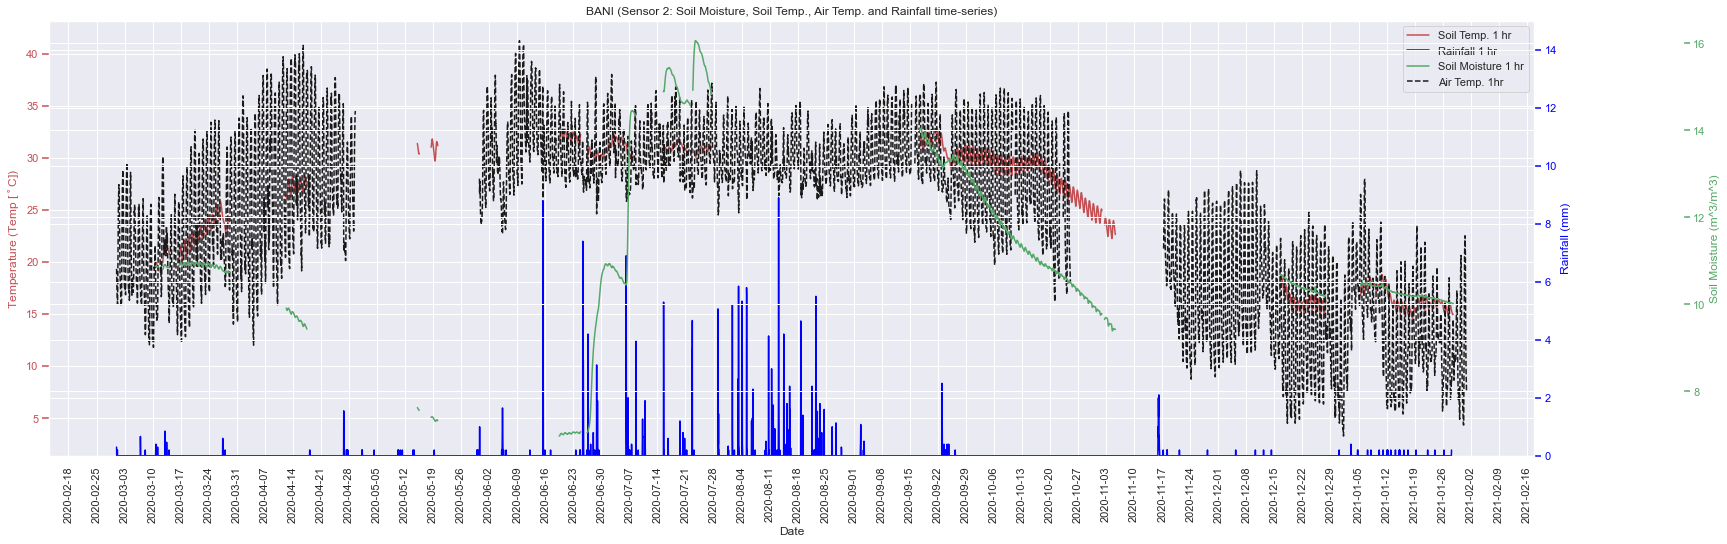

In [14]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
# par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S2Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(df_1hr.index, df_1hr.S2SM, "g-", label="Soil Moisture 1 hr")
p2, = par1.plot(df2_1hr.index, df2_1hr['Int_Rainfall (mm)'], color = 'blue', label="Rainfall 1 hr")
p4, = host.plot(df3_1hr.index, df3_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 2: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
par2.set_ylabel("Soil Moisture (m^3/m^3)")
host.set_ylabel("Temperature (Temp [$^\circ$C])")
par1.set_ylabel("Rainfall (mm)")
par1.set_ylim((0, 15))
# par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
# par3.yaxis.label.set_color(p4.get_color())

# host.xaxis.set_major_locator(days)
plt.xticks(rotation = 90)
# host.xaxis.set_major_formatter(yearsFmt)
# host.xaxis.set_minor_locator(months)

tkw = dict(size=7, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw, rotation = 90)

lines = [p1, p2, p3, p4]
host.xaxis.set_major_locator(dt.WeekdayLocator(interval=1))
host.legend(lines, [l.get_label() for l in lines])

plt.show()

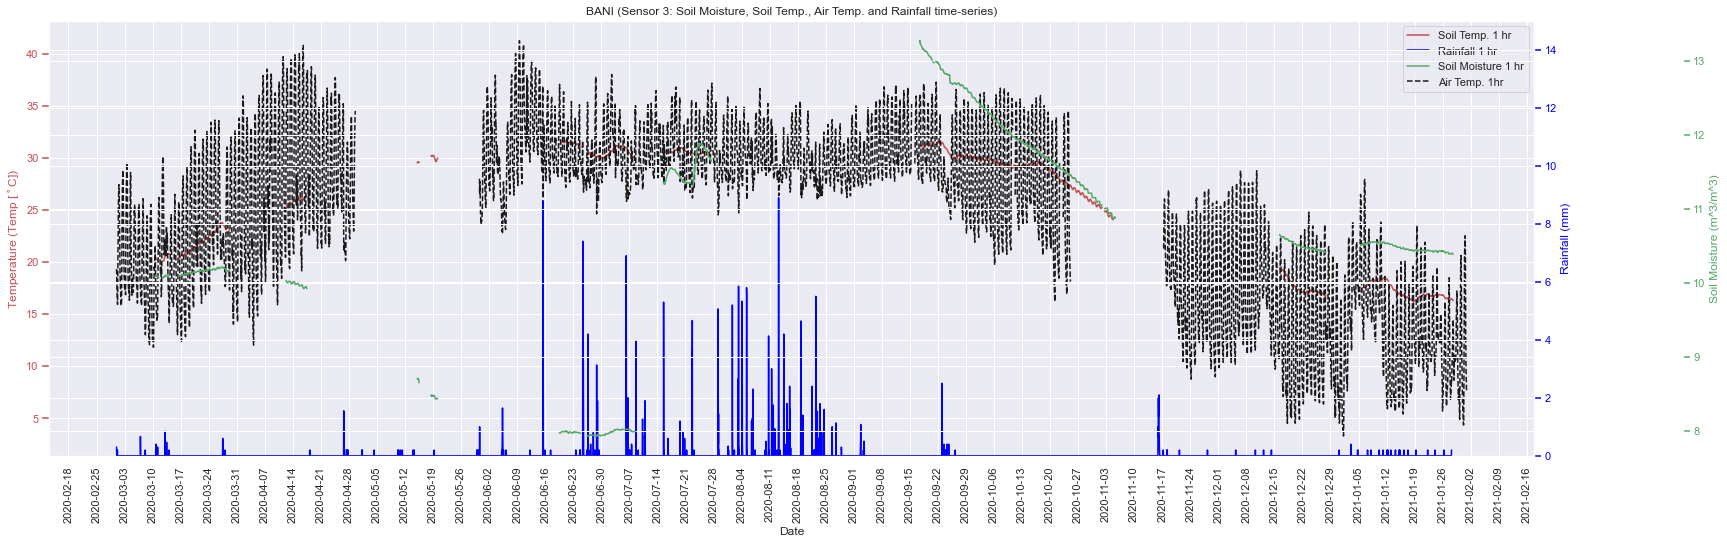

In [15]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
# par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S3Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(df_1hr.index, df_1hr.S3SM, "g-", label="Soil Moisture 1 hr")
p2, = par1.plot(df2_1hr.index, df2_1hr['Int_Rainfall (mm)'], color = 'blue', label="Rainfall 1 hr")
p4, = host.plot(df3_1hr.index, df3_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 3: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
par2.set_ylabel("Soil Moisture (m^3/m^3)")
host.set_ylabel("Temperature (Temp [$^\circ$C])")
par1.set_ylabel("Rainfall (mm)")
par1.set_ylim((0, 15))
# par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
# par3.yaxis.label.set_color(p4.get_color())

# host.xaxis.set_major_locator(days)
plt.xticks(rotation = 90)
# host.xaxis.set_major_formatter(yearsFmt)
# host.xaxis.set_minor_locator(months)

tkw = dict(size=7, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw, rotation = 90)

lines = [p1, p2, p3, p4]
host.xaxis.set_major_locator(dt.WeekdayLocator(interval=1))
host.legend(lines, [l.get_label() for l in lines])

plt.show()

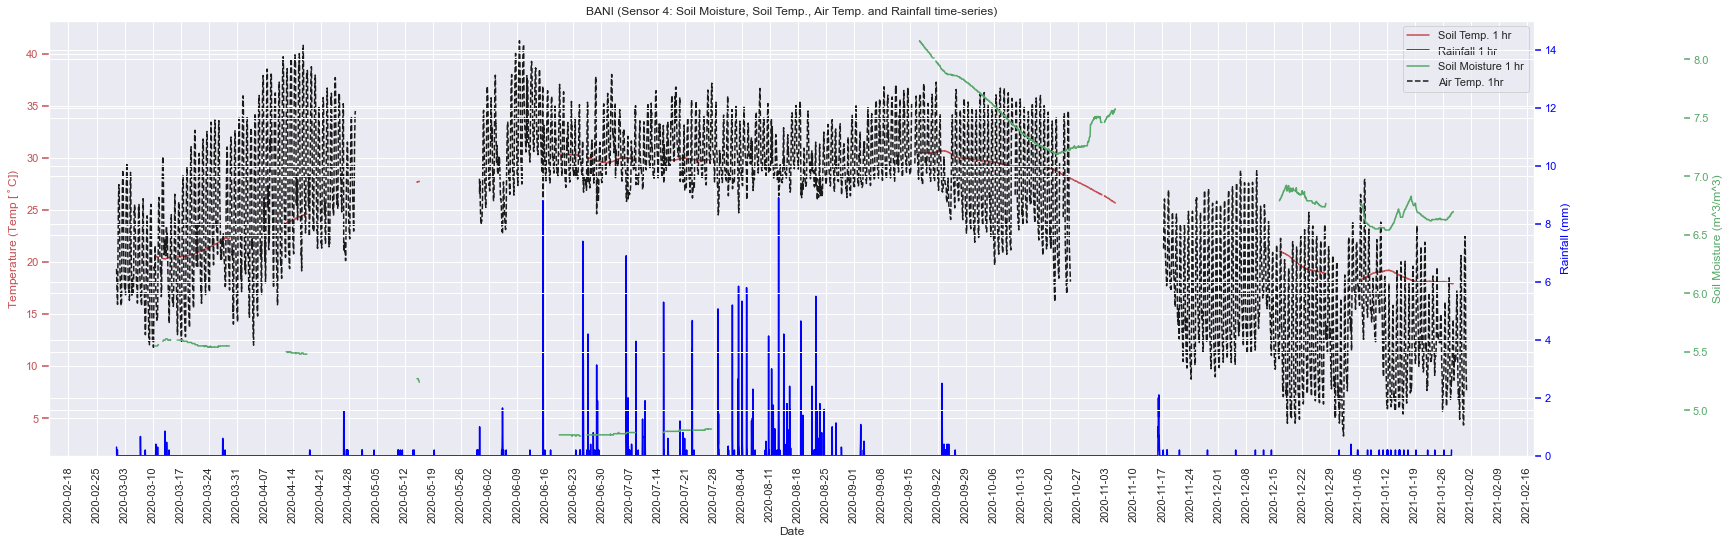

In [16]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
# par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S4Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(df_1hr.index, df_1hr.S4SM, "g-", label="Soil Moisture 1 hr")
p2, = par1.plot(df2_1hr.index, df2_1hr['Int_Rainfall (mm)'], color = 'blue', label="Rainfall 1 hr")
p4, = host.plot(df3_1hr.index, df3_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 4: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
par2.set_ylabel("Soil Moisture (m^3/m^3)")
host.set_ylabel("Temperature (Temp [$^\circ$C])")
par1.set_ylabel("Rainfall (mm)")
par1.set_ylim((0, 15))
# par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
# par3.yaxis.label.set_color(p4.get_color())

# host.xaxis.set_major_locator(days)
plt.xticks(rotation = 90)
# host.xaxis.set_major_formatter(yearsFmt)
# host.xaxis.set_minor_locator(months)

tkw = dict(size=7, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw, rotation = 90)

lines = [p1, p2, p3, p4]
host.xaxis.set_major_locator(dt.WeekdayLocator(interval=1))
host.legend(lines, [l.get_label() for l in lines])

plt.show()

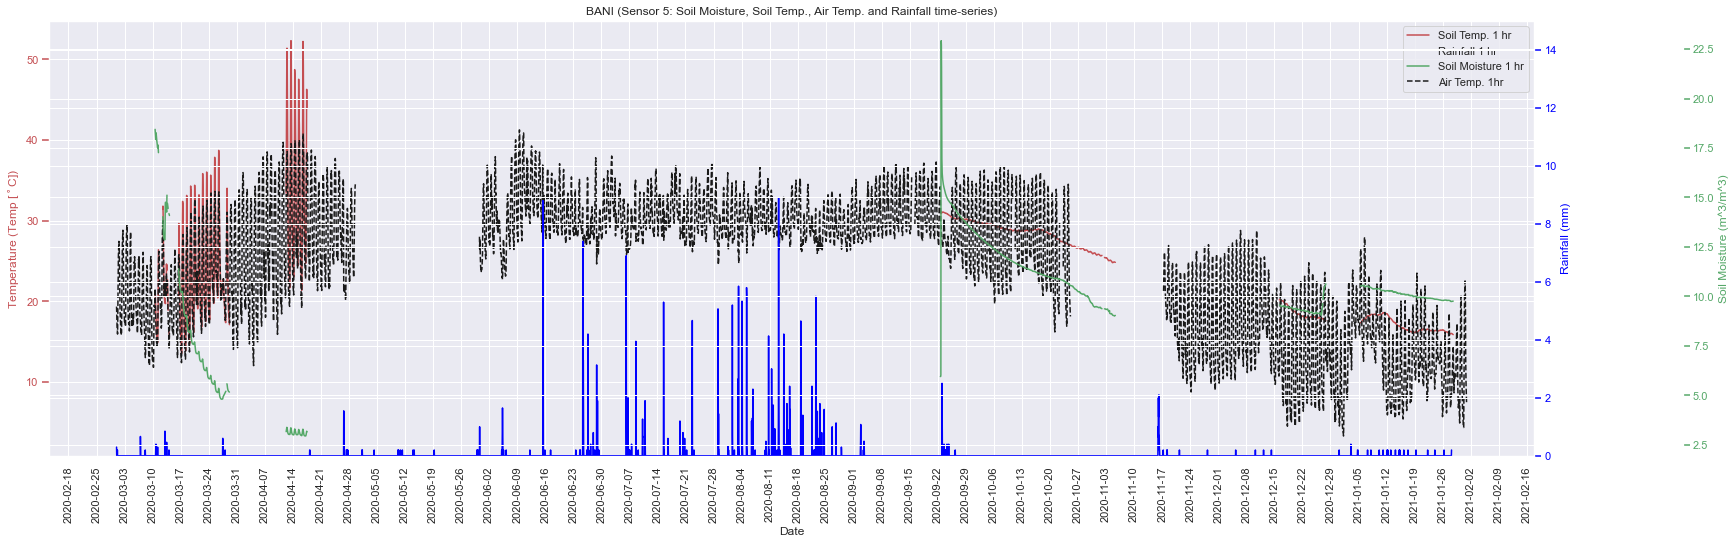

In [17]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
# par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S5Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(df_1hr.index, df_1hr.S5SM, "g-", label="Soil Moisture 1 hr")
p2, = par1.plot(df2_1hr.index, df2_1hr['Int_Rainfall (mm)'], color = 'blue', label="Rainfall 1 hr")
p4, = host.plot(df3_1hr.index, df3_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 5: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
par2.set_ylabel("Soil Moisture (m^3/m^3)")
host.set_ylabel("Temperature (Temp [$^\circ$C])")
par1.set_ylabel("Rainfall (mm)")
par1.set_ylim((0, 15))
# par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
# par3.yaxis.label.set_color(p4.get_color())

# host.xaxis.set_major_locator(days)
plt.xticks(rotation = 90)
# host.xaxis.set_major_formatter(yearsFmt)
# host.xaxis.set_minor_locator(months)

tkw = dict(size=7, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw, rotation = 90)

lines = [p1, p2, p3, p4]
host.xaxis.set_major_locator(dt.WeekdayLocator(interval=1))
host.legend(lines, [l.get_label() for l in lines])

plt.show()

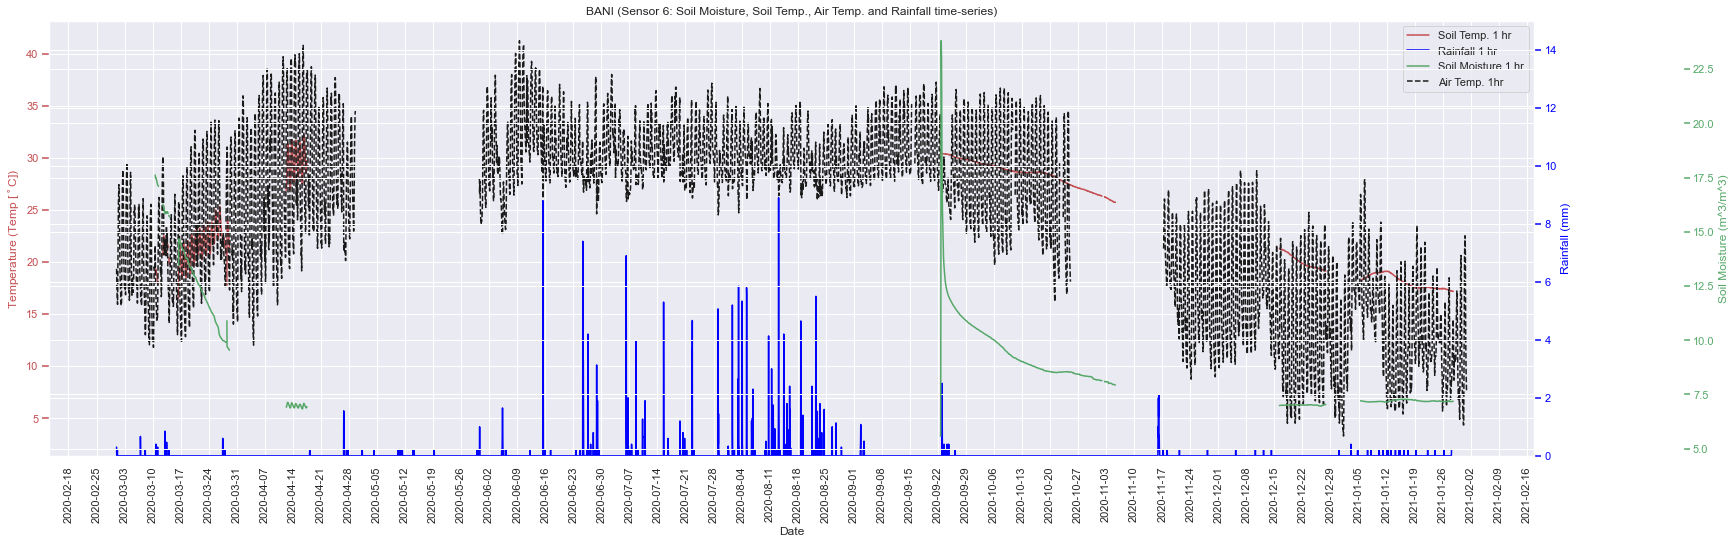

In [18]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
# par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S6Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(df_1hr.index, df_1hr.S6SM, "g-", label="Soil Moisture 1 hr")
p2, = par1.plot(df2_1hr.index, df2_1hr['Int_Rainfall (mm)'], color = 'blue', label="Rainfall 1 hr")
p4, = host.plot(df3_1hr.index, df3_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 6: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
par2.set_ylabel("Soil Moisture (m^3/m^3)")
host.set_ylabel("Temperature (Temp [$^\circ$C])")
par1.set_ylabel("Rainfall (mm)")
par1.set_ylim((0, 15))
# par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
# par3.yaxis.label.set_color(p4.get_color())

# host.xaxis.set_major_locator(days)
plt.xticks(rotation = 90)
# host.xaxis.set_major_formatter(yearsFmt)
# host.xaxis.set_minor_locator(months)

tkw = dict(size=7, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw, rotation = 90)

lines = [p1, p2, p3, p4]
host.xaxis.set_major_locator(dt.WeekdayLocator(interval=1))
host.legend(lines, [l.get_label() for l in lines])

plt.show()

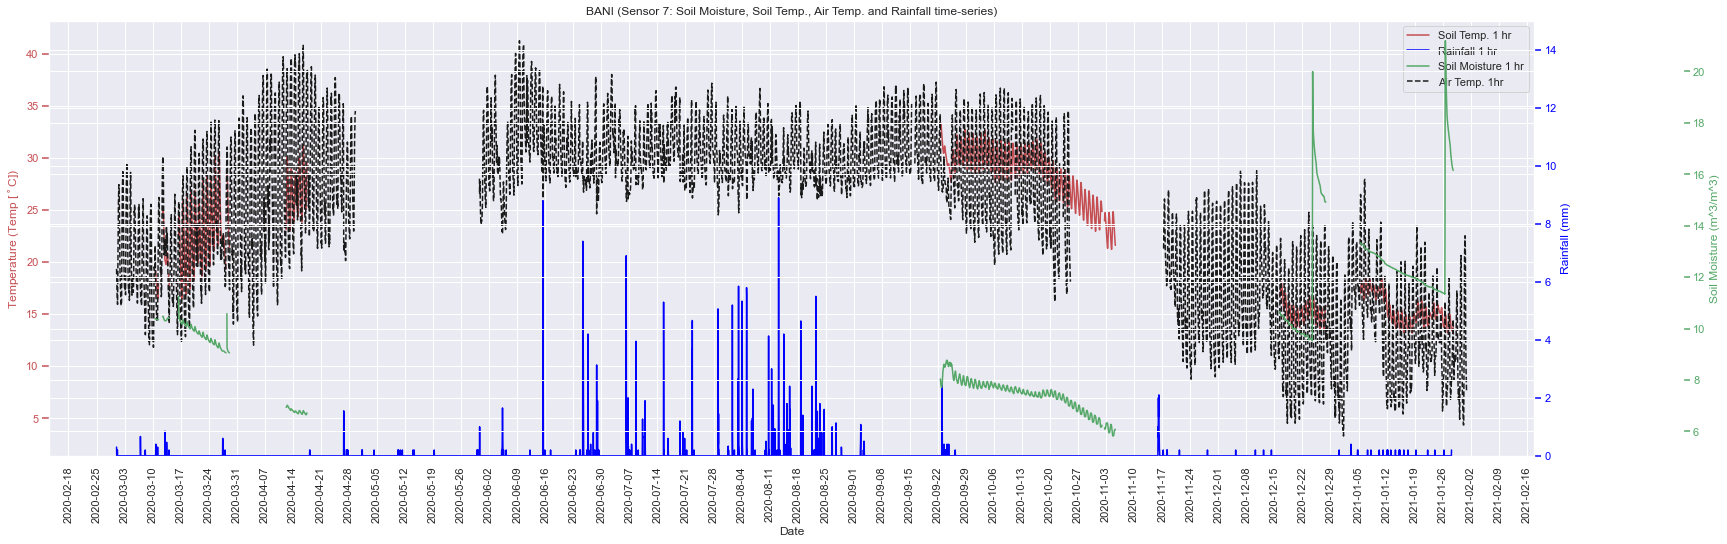

In [19]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
# par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S7Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(df_1hr.index, df_1hr.S7SM, "g-", label="Soil Moisture 1 hr")
p2, = par1.plot(df2_1hr.index, df2_1hr['Int_Rainfall (mm)'], color = 'blue', label="Rainfall 1 hr")
p4, = host.plot(df3_1hr.index, df3_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 7: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
par2.set_ylabel("Soil Moisture (m^3/m^3)")
host.set_ylabel("Temperature (Temp [$^\circ$C])")
par1.set_ylabel("Rainfall (mm)")
par1.set_ylim((0, 15))
# par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
# par3.yaxis.label.set_color(p4.get_color())

# host.xaxis.set_major_locator(days)
plt.xticks(rotation = 90)
# host.xaxis.set_major_formatter(yearsFmt)
# host.xaxis.set_minor_locator(months)

tkw = dict(size=7, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw, rotation = 90)

lines = [p1, p2, p3, p4]
host.xaxis.set_major_locator(dt.WeekdayLocator(interval=1))
host.legend(lines, [l.get_label() for l in lines])

plt.show()

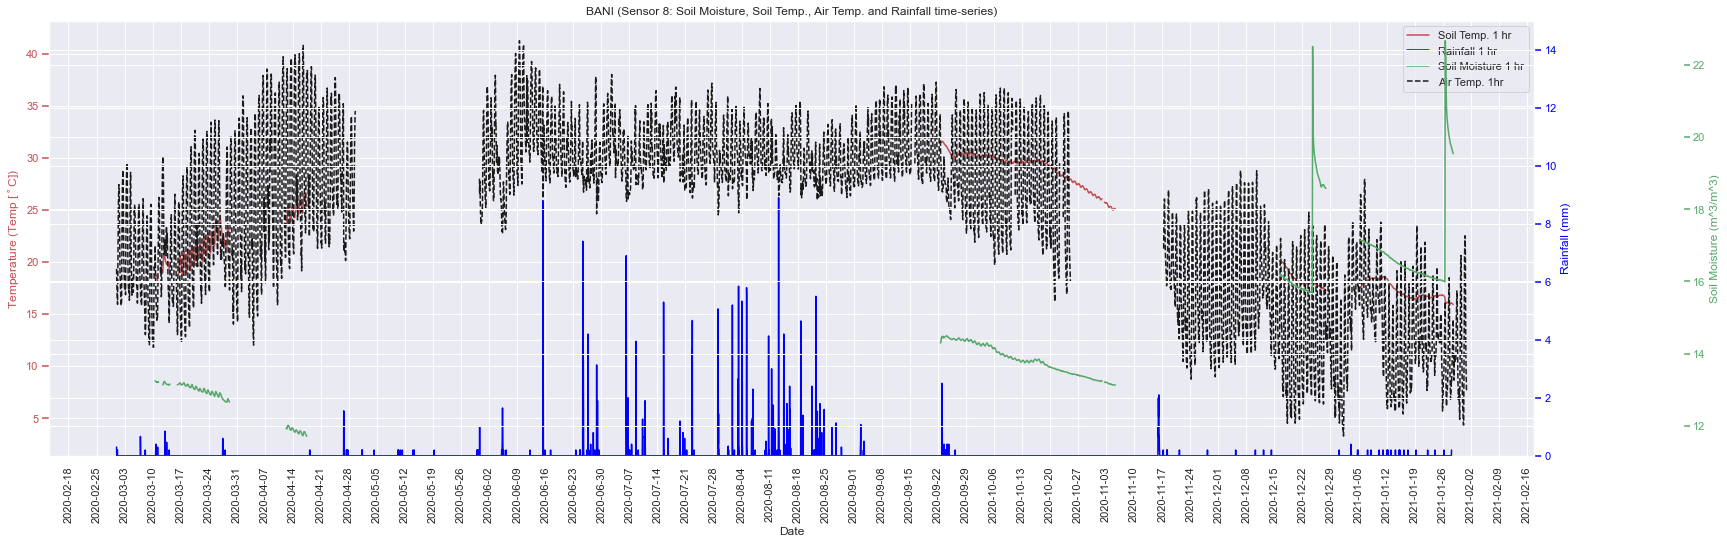

In [20]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
# par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S8Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(df_1hr.index, df_1hr.S8SM, "g-", label="Soil Moisture 1 hr")
p2, = par1.plot(df2_1hr.index, df2_1hr['Int_Rainfall (mm)'], color = 'blue', label="Rainfall 1 hr")
p4, = host.plot(df3_1hr.index, df3_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 8: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
par2.set_ylabel("Soil Moisture (m^3/m^3)")
host.set_ylabel("Temperature (Temp [$^\circ$C])")
par1.set_ylabel("Rainfall (mm)")
par1.set_ylim((0, 15))
# par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
# par3.yaxis.label.set_color(p4.get_color())

# host.xaxis.set_major_locator(days)
plt.xticks(rotation = 90)
# host.xaxis.set_major_formatter(yearsFmt)
# host.xaxis.set_minor_locator(months)

tkw = dict(size=7, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw, rotation = 90)

lines = [p1, p2, p3, p4]
host.xaxis.set_major_locator(dt.WeekdayLocator(interval=1))
host.legend(lines, [l.get_label() for l in lines])

plt.show()

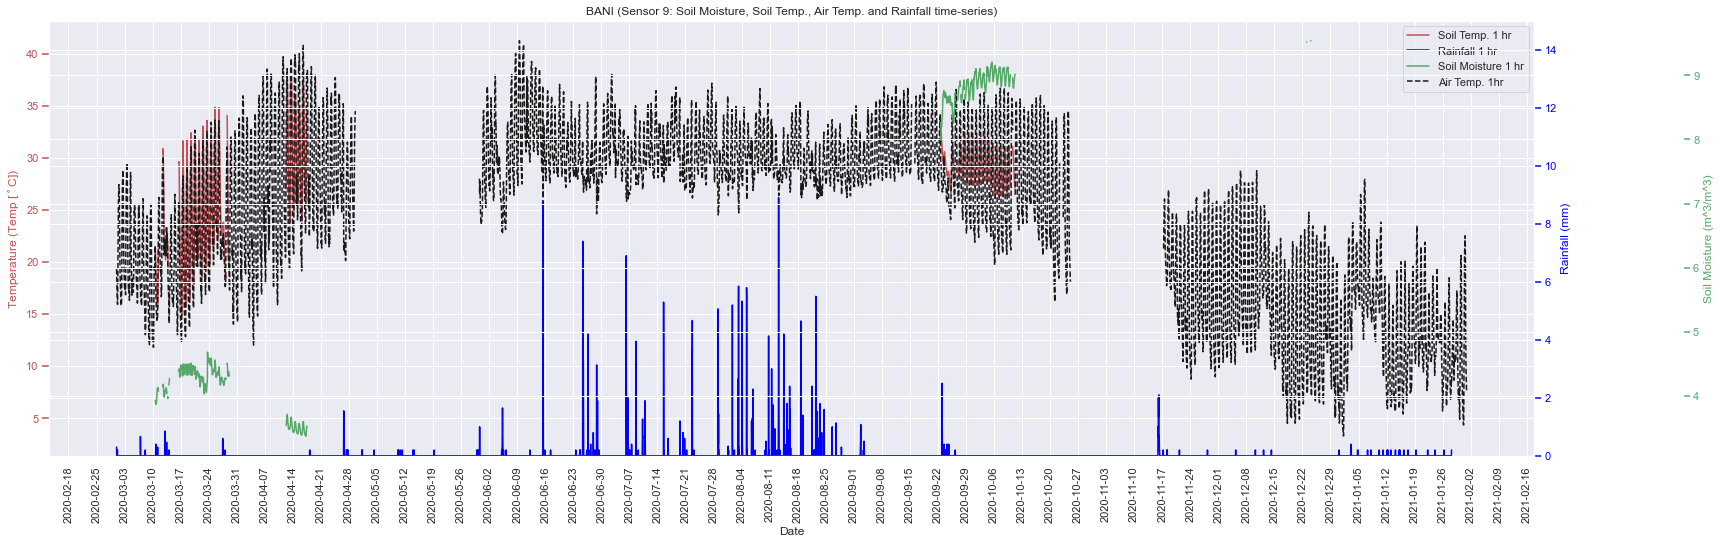

In [21]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
# par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S9Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(df_1hr.index, df_1hr.S9SM, "g-", label="Soil Moisture 1 hr")
p2, = par1.plot(df2_1hr.index, df2_1hr['Int_Rainfall (mm)'], color = 'blue', label="Rainfall 1 hr")
p4, = host.plot(df3_1hr.index, df3_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 9: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
par2.set_ylabel("Soil Moisture (m^3/m^3)")
host.set_ylabel("Temperature (Temp [$^\circ$C])")
par1.set_ylabel("Rainfall (mm)")
par1.set_ylim((0, 15))
# par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
# par3.yaxis.label.set_color(p4.get_color())

# host.xaxis.set_major_locator(days)
plt.xticks(rotation = 90)
# host.xaxis.set_major_formatter(yearsFmt)
# host.xaxis.set_minor_locator(months)

tkw = dict(size=7, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw, rotation = 90)

lines = [p1, p2, p3, p4]
host.xaxis.set_major_locator(dt.WeekdayLocator(interval=1))
host.legend(lines, [l.get_label() for l in lines])

plt.show()

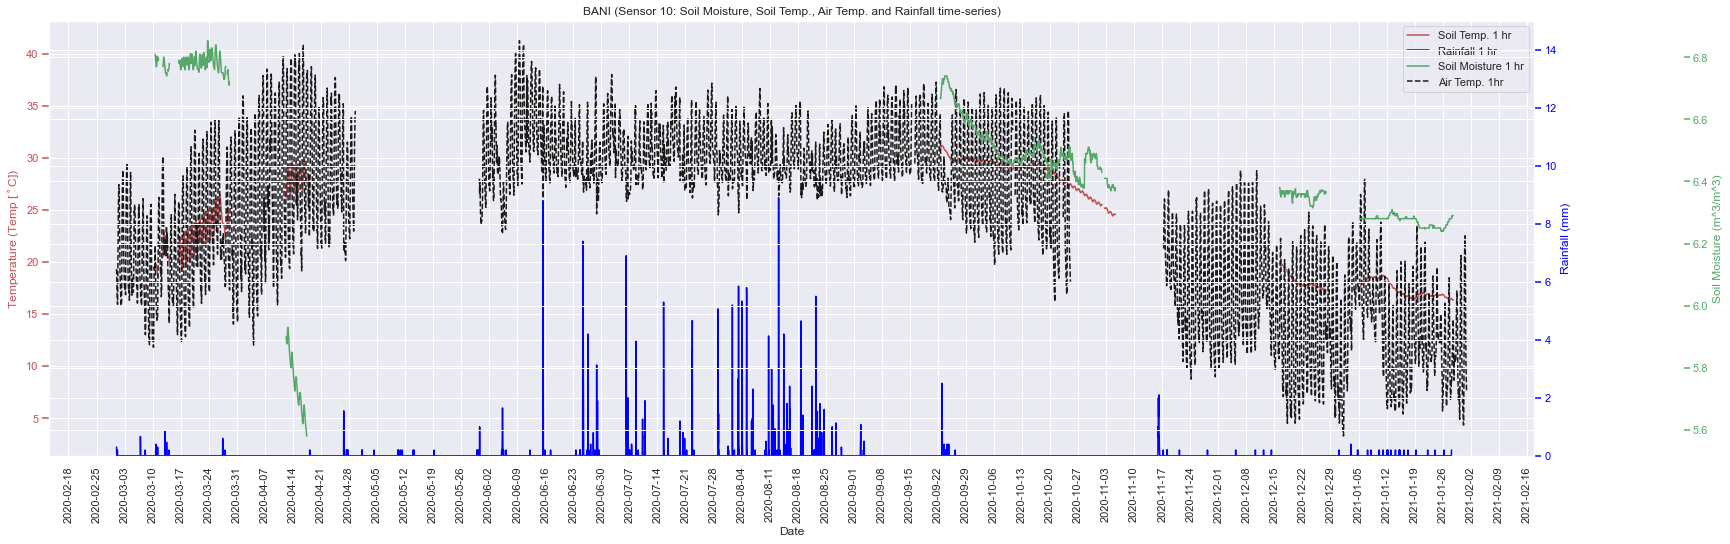

In [22]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize = (25, 8))
fig.subplots_adjust(right=0.95)

par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()
# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
# par3.spines["left"].set_position(("axes", 1.1))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# make_patch_spines_invisible(par3)
# Second, show the right spine.
par2.spines["right"].set_visible(True)
# par3.spines["left"].set_visible(True)

p1, = host.plot(df_1hr.index, df_1hr.S10Temp, "r-", label="Soil Temp. 1 hr")
p3, = par2.plot(df_1hr.index, df_1hr.S10SM, "g-", label="Soil Moisture 1 hr")
p2, = par1.plot(df2_1hr.index, df2_1hr['Int_Rainfall (mm)'], color = 'blue', label="Rainfall 1 hr")
p4, = host.plot(df3_1hr.index, df3_1hr['Temp (0C)'], "k--", label = "Air Temp. 1hr")

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.set_title("BANI (Sensor 10: Soil Moisture, Soil Temp., Air Temp. and Rainfall time-series)")
host.set_xlabel("Date")
par2.set_ylabel("Soil Moisture (m^3/m^3)")
host.set_ylabel("Temperature (Temp [$^\circ$C])")
par1.set_ylabel("Rainfall (mm)")
par1.set_ylim((0, 15))
# par3.set_ylabel("Air Temperature (Temp [$^\circ$C])")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
# par3.yaxis.label.set_color(p4.get_color())

# host.xaxis.set_major_locator(days)
plt.xticks(rotation = 90)
# host.xaxis.set_major_formatter(yearsFmt)
# host.xaxis.set_minor_locator(months)

tkw = dict(size=7, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw, rotation = 90)

lines = [p1, p2, p3, p4]
host.xaxis.set_major_locator(dt.WeekdayLocator(interval=1))
host.legend(lines, [l.get_label() for l in lines])

plt.show()